In [1]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
df = pd.read_csv("../enhanced_anesthesia_dataset_v4.csv")

In [3]:
features = [
    'Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI', 'IBW', 'ABW', 'Diet',
    'OrganFunction', 'KidneyFunction', 'CardiovascularHistory',
    'Diabetes', 'CurrentMedications', 'ProcedureType', 'ASA_Class',
    'ALDH2_Genotype', 'CYP2D6_Type', 'CYP2C9_Type', 'CYP2B6_Type', 'CYP3A4_Type',
    'UGT1A1_Variant', 'RYR1_Variant', 'SCN9A_Variant', 'F5_Variant',
    'GABRA2_Variant', 'OPRM1_Variant', 'General_AnesthesiaType'
]

target = 'General_Dosage'


In [4]:
df.dropna(subset=features + [target], inplace=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.2, random_state=42
)

In [6]:
cat_features = [i for i, col in enumerate(X_train.columns) if df[col].dtype == 'object']

In [7]:
model = CatBoostRegressor(
    loss_function='RMSE',
    verbose=100,
    random_state=42
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),  
    use_best_model=True,
    verbose=100
)

Learning rate set to 0.087741
0:	learn: 33.8202346	test: 33.9292979	best: 33.9292979 (0)	total: 231ms	remaining: 3m 50s
100:	learn: 6.7701200	test: 6.7200671	best: 6.7200671 (100)	total: 5.61s	remaining: 49.9s
200:	learn: 5.6682819	test: 5.7342078	best: 5.7342078 (200)	total: 11s	remaining: 43.8s
300:	learn: 5.3498288	test: 5.4573657	best: 5.4573039 (298)	total: 16.5s	remaining: 38.4s
400:	learn: 5.1720335	test: 5.3174701	best: 5.3174701 (400)	total: 22.1s	remaining: 33.1s
500:	learn: 5.0641043	test: 5.2543686	best: 5.2543686 (500)	total: 27.7s	remaining: 27.6s
600:	learn: 4.9800148	test: 5.2170280	best: 5.2170280 (600)	total: 33.3s	remaining: 22.1s
700:	learn: 4.9246260	test: 5.1931783	best: 5.1931783 (700)	total: 39s	remaining: 16.6s
800:	learn: 4.8692533	test: 5.1779209	best: 5.1779209 (800)	total: 44.7s	remaining: 11.1s
900:	learn: 4.8243510	test: 5.1651487	best: 5.1649064 (891)	total: 50.5s	remaining: 5.55s
999:	learn: 4.7830033	test: 5.1563077	best: 5.1560921 (998)	total: 56s	rem

In [8]:
y_pred = model.predict(X_test)

print(f"📈 MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"📉 RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"📊 R²: {r2_score(y_test, y_pred):.4f}")

📈 MAE: 3.83
📉 RMSE: 5.16
📊 R²: 0.9795


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


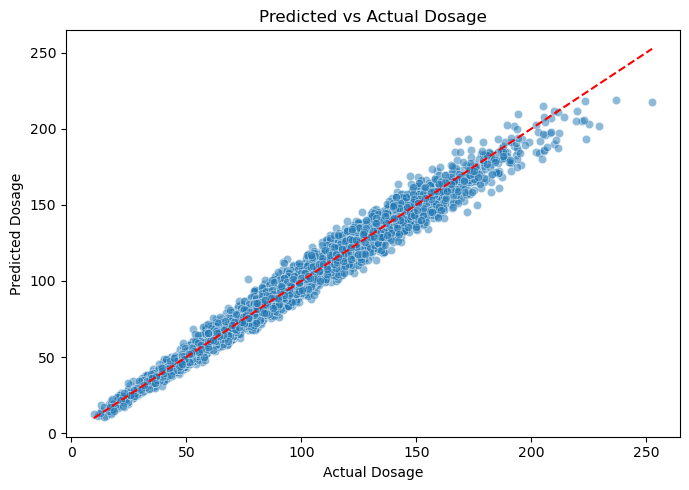

In [9]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Dosage")
plt.ylabel("Predicted Dosage")
plt.title("Predicted vs Actual Dosage")
plt.tight_layout()
plt.show()

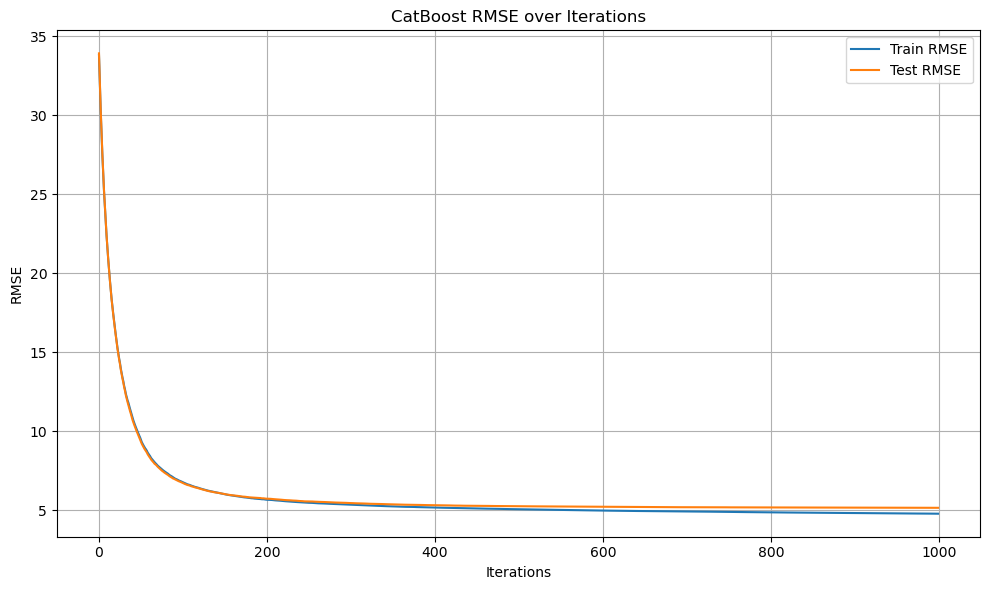

In [10]:
evals_result = model.get_evals_result()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(evals_result['learn']['RMSE'], label='Train RMSE')
plt.plot(evals_result['validation']['RMSE'], label='Test RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('CatBoost RMSE over Iterations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

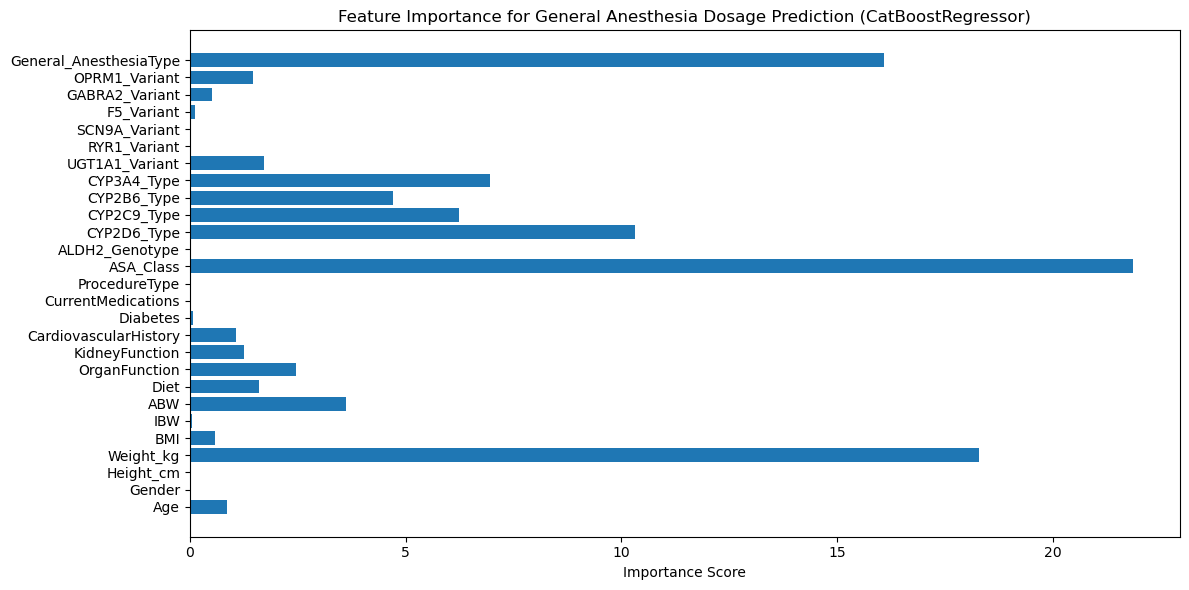

In [11]:
import matplotlib.pyplot as plt

feature_importances = model.get_feature_importance()
feature_names = X_train.columns

plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance Score')
plt.title('Feature Importance for General Anesthesia Dosage Prediction (CatBoostRegressor)')
plt.tight_layout()
plt.show()

In [12]:
os.makedirs("saved_model", exist_ok=True)
model.save_model("saved_model/general_dosage_model.cbm")
joblib.dump({
    "features": features,
    "cat_features": cat_features,
    "target": target
}, "saved_model/general_dosage_metadata.pkl")

print("\n✅ Model saved to 'saved_model/general_dosage_model.cbm'")


✅ Model saved to 'saved_model/general_dosage_model.cbm'
